# 차원 축소



### 차원의 저주

- 데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상

-> 차원이 증가, 혹은 변수가 증가함에 따라 모델의 성능이 나빠지는 현상
- 차원이 늘어날수록 빈 공간만 생김.

빈공간의 면적 : 1차원의 점 < 2차원의 점 < 3차원의 점 < 4차원의 점

간단하게 차원을 줄이거나 데이터를 많이 획득함.

## PCA 시각화하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

In [3]:
from sklearn.decomposition import PCA
# 2 개의 주성분만 유지
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

In [4]:
x_pca = pca.transform(x_scaled)
print("원본 데이터 형태 :" , x_scaled.shape)
print("축소된 데이터 형태 : ", x_pca.shape)

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 :  (569, 2)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


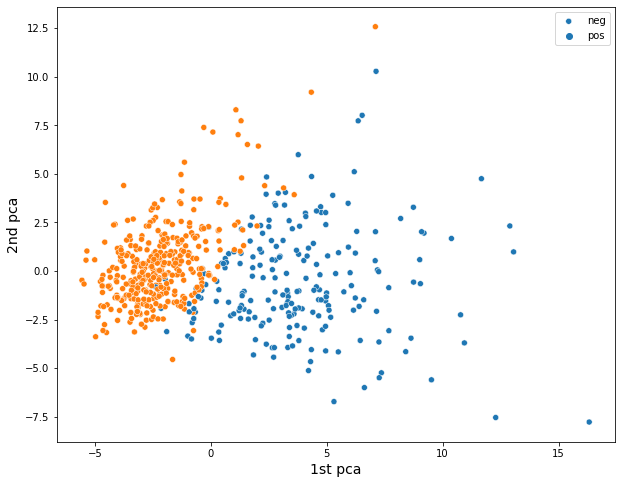

In [5]:
plt.figure(figsize = (10,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1], hue = cancer.target)
plt.legend(['neg','pos'], loc = 'best')
plt.xlabel('1st pca', fontsize = 14)
plt.ylabel('2nd pca', fontsize = 14)
plt.show()

pca는 비지도 학습이므로 단순히 데이터에 있는 상관관계만을 고려한다.

위에 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었으며 꽤 구분을 잘했다.

In [6]:
# 중요도에 따른 각행의 주성분 나타내기
print('pca 주성분 :', pca.components_)

pca 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


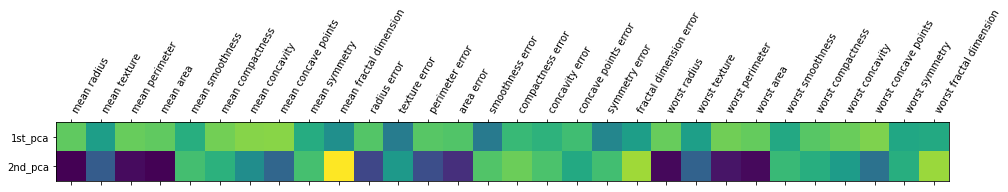

In [7]:
# 히트맵
plt.matshow(pca.components_, cmap = 'viridis')
# y축 설정
plt.yticks([0,1],['1st_pca','2nd_pca'])
# x축 설정, ha = 레이블 텍스트 오른쪽 끝을 눈금에 맞춤
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation = 60, ha = 'left')
plt.show()

## 고유 얼굴 특성 추출

In [8]:
from sklearn.datasets import fetch_lfw_people

In [9]:
# 겹치지 않는  최소 사람수 20, 사이즈 비율 0.7
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

In [79]:
image_shape = people.images.shape
print("image shape :",image_shape)

image shape : (3023, 87, 65)


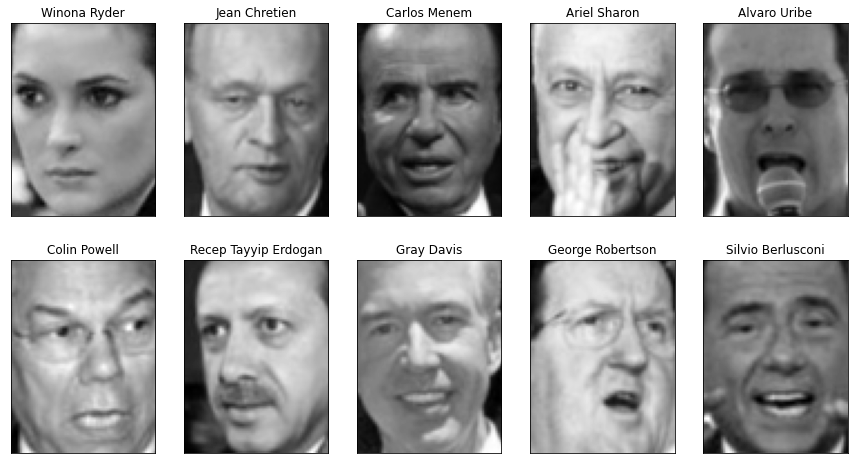

In [80]:
fig, axes = plt.subplots(2,5, figsize = (15,8),
                        subplot_kw = {'xticks' : (), 'yticks' : ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()) :
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    plt.gray()

## 차원을 감소시키는 두 가지 주요한 접근법

### 1. 투영

ex) 3차원의 평면 형태로 데이터가 존재 할 경우 2차 평면 형태로 옮긴다.

그러나 스위스 롤 처럼 데이터셋을 마냥 투영시키는게 답은 아니다.

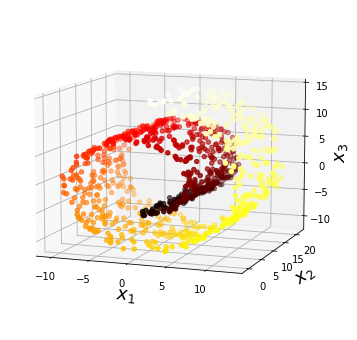

In [89]:
# 스위스롤
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [81]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### 2. 매니폴드 학습

- 고차원 공간을 휘어지거나 뒤틀린 저차원 공간을 나타내는 것을 의미한다.

In [82]:
import numpy as np 

X_centered = X - X.mean(axis = 0)

U, s, Vt = np.linalg.svd(X_centered)

In [83]:
w2 = Vt.T[:,:2]
X2d = X_centered.dot(w2)

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x2d = pca.fit_transform(X)

In [85]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])